In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/custom_model/5_cls.zip

Archive:  /content/drive/MyDrive/custom_model/5_cls.zip
  inflating: 5_cls/discription.txt   
   creating: 5_cls/test/
   creating: 5_cls/test/cataract/
  inflating: 5_cls/test/cataract/10_JPG_jpg.rf.71aa847d03aeaac1f45031187a950b8b.jpg  
  inflating: 5_cls/test/cataract/11_JPG_jpg.rf.8067a193cb439e447e052ddb56f25254.jpg  
  inflating: 5_cls/test/cataract/11_JPG_jpg.rf.c8be22ccffefdd94fe30c7037f434d47.jpg  
  inflating: 5_cls/test/cataract/12_jpg.rf.5c479c57e5106609361b54815f637de9.jpg  
  inflating: 5_cls/test/cataract/13_jpg.rf.fdf261a3cb970035f83ae5a0c56f3d05.jpg  
  inflating: 5_cls/test/cataract/13_JPG_jpg.rf.b15332d10dce8ee102ce78ced867023b.jpg  
  inflating: 5_cls/test/cataract/14_jpg.rf.6cd4c8f520cc3e17c4d19edac9b8410a.jpg  
  inflating: 5_cls/test/cataract/14_jpg.rf.706c5a49e2f17f71070907f6b7407e6f.jpg  
  inflating: 5_cls/test/cataract/15_jpg.rf.2e255cf78204e94b49ada7b89a5be7b4.jpg  
  inflating: 5_cls/test/cataract/15_jpg.rf.f3ded639e6a90391ac5ea8f37bc436c4.jpg  
  inflating

In [3]:
train_path = "/content/5_cls/train"
test_path = "/content/5_cls/test"
val_path = "/content/5_cls/val"

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
train_data = train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),shuffle=True,seed=42,batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_path,target_size=(224,224),seed=42)
val_data = val_datagen.flow_from_directory(directory=val_path,target_size=(224,224),seed=42)

Found 1205 images belonging to 5 classes.
Found 156 images belonging to 5 classes.
Found 148 images belonging to 5 classes.


In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout,Rescaling,Reshape,InputLayer,GlobalAveragePooling2D,BatchNormalization,MaxPooling2D

In [30]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',input_shape=(224,224,3)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)
    return model

In [31]:
model = prepare_model()

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [33]:
history = model.fit(train_data,epochs=80,validation_data=val_data,shuffle=True,callbacks=[callback])

Epoch 1/80
38/38 [==============================] - 13s 258ms/step - loss: 1.5510 - accuracy: 0.3303 - val_loss: 1.5062 - val_accuracy: 0.3446
Epoch 2/80
38/38 [==============================] - 8s 204ms/step - loss: 1.5109 - accuracy: 0.3419 - val_loss: 1.5217 - val_accuracy: 0.3446
Epoch 3/80
38/38 [==============================] - 9s 222ms/step - loss: 1.4833 - accuracy: 0.3560 - val_loss: 1.4812 - val_accuracy: 0.3243
Epoch 4/80
38/38 [==============================] - 9s 221ms/step - loss: 1.4537 - accuracy: 0.3900 - val_loss: 1.4784 - val_accuracy: 0.3514
Epoch 5/80
38/38 [==============================] - 9s 247ms/step - loss: 1.4318 - accuracy: 0.4008 - val_loss: 1.4444 - val_accuracy: 0.3716
Epoch 6/80
38/38 [==============================] - 8s 195ms/step - loss: 1.3840 - accuracy: 0.4141 - val_loss: 1.3731 - val_accuracy: 0.4595
Epoch 7/80
38/38 [==============================] - 8s 208ms/step - loss: 1.3550 - accuracy: 0.4622 - val_loss: 1.3874 - val_accuracy: 0.4392
Epoch

In [34]:
model.evaluate(test_data)

5/5 [==============================] - 1s 200ms/step - loss: 0.5115 - accuracy: 0.8718


[0.5115488171577454, 0.8717948794364929]

In [35]:
from sklearn.metrics import classification_report

In [38]:
pred = model.predict(test_data).argmax(axis=1)

5/5 [==============================] - 1s 199ms/step


In [39]:
print(classification_report(test_data.labels,pred))

              precision    recall  f1-score   support

           0       0.29      0.32      0.30        44
           1       0.08      0.10      0.09        20
           2       0.31      0.33      0.32        52
           3       0.00      0.00      0.00        18
           4       0.12      0.09      0.10        22

    accuracy                           0.22       156
   macro avg       0.16      0.17      0.16       156
weighted avg       0.21      0.22      0.22       156



In [16]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(test_data.labels,pred)

array([[14, 13, 12,  2,  3],
       [ 8,  2,  7,  0,  3],
       [17,  3, 17,  7,  8],
       [ 4,  3, 10,  0,  1],
       [ 5,  4,  9,  2,  2]])

In [41]:
import matplotlib.pyplot as plt

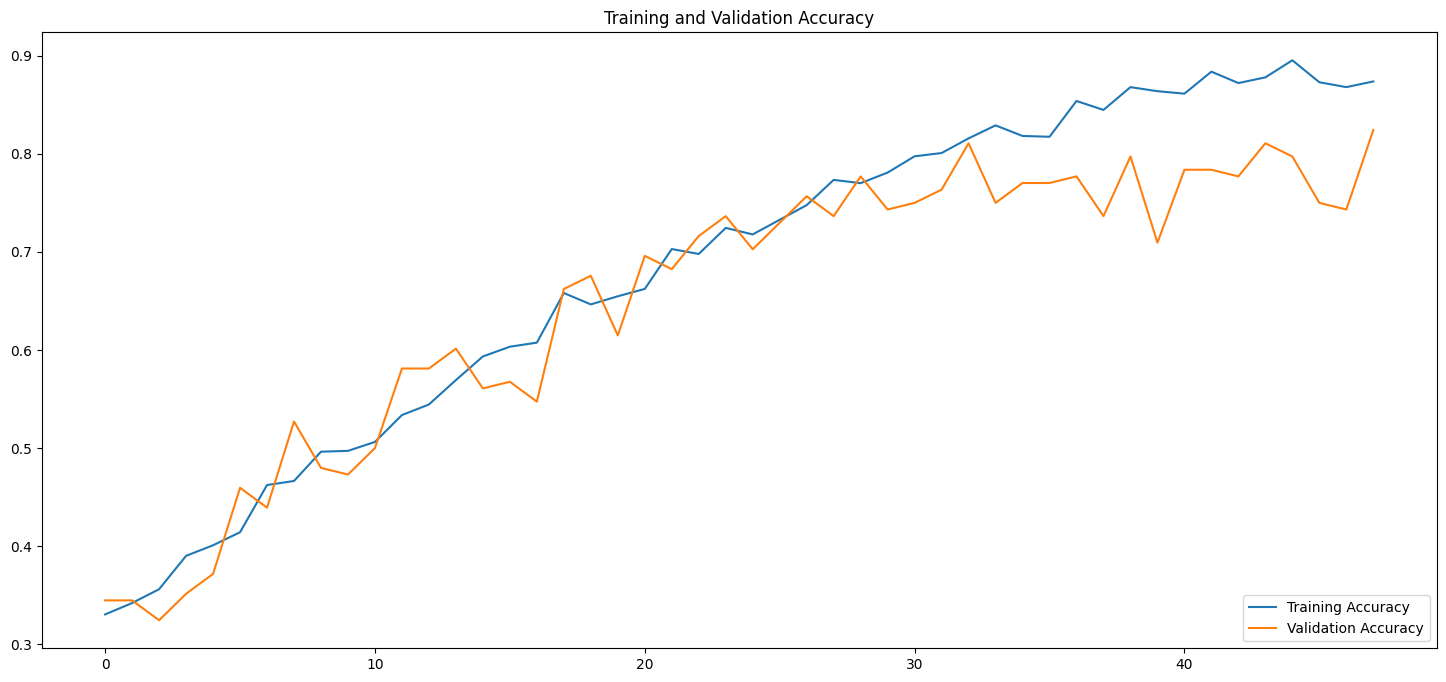

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(48)

plt.figure(figsize=(18,8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()